# Tensorflow2 KeyNotes
### ==== Neural Network based Fourier Transform (TF2) ====
### Instructions

These serial notebooks are intended to record my practicing and keynotes with deep learning in the framework of TensorFlow 2. Within these notebooks, I demonstrate the networks with specific examples and my personal interpretations.  You can find instructions in each section for each project.  Feel free to refer to it if is helpful for your work. 

In this notebook, I demonstrate an experiment of using dense neural network to simulated the Fast Fourier Transform for discrete time signal analysis, a random generated time series and a synthetic time series with designated amplitude/phase parameters are used in the verification. The following contents are included in this notebook:

1. Random time series generation.
2. Encode of complex time series in the Neural Network Training and Testing.
3. Dense neural network based Fourier Transfrom

### Code by Hao, Zhao, Oct, 2020.



### Import the tensorflow library

In [1]:
import tensorflow as tf
print(tf.__version__)

2.2.0



###  Load the external libraries

In [2]:
import numpy as np
# %matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.fftpack
import time
import cmath

from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Dense,BatchNormalization,Dropout,Conv1D,SimpleRNN,AveragePooling1D,Flatten


###  Generate the random series and corresponding FFT transform counterpart

In [3]:
number_arrays = 10000
length_series = 256

input_series          = np.random.normal(0,1,(number_arrays,length_series))
fft_tansfrom_series   = scipy.fftpack.fft(input_series)


## generate and encode the training and test set using a naive approach to handel the complex number in Neural network

train_input = input_series[:np.int(number_arrays*0.8),:]
test_input  = input_series[np.int(number_arrays*0.8):,:]

train_target_real =  fft_tansfrom_series.real[:np.int(number_arrays*0.8),:]
train_target_imag =  fft_tansfrom_series.imag[:np.int(number_arrays*0.8),:]

test_target_real =  fft_tansfrom_series.real[np.int(number_arrays*0.8):,:]
test_target_imag =  fft_tansfrom_series.imag[np.int(number_arrays*0.8):,:]

# prepare the target series
train_target = np.zeros((train_target_real.shape[0],length_series*2))
train_target[:,0::2] =  train_target_real
train_target[:,1::2] =  train_target_imag 

test_target  = np.zeros((test_target_real.shape[0],length_series*2))
test_target[:,0::2] =  test_target_real
test_target[:,1::2] =  test_target_imag 

# print train set's size
print('=== input of training set size: {}  === '.format(train_input.shape))
print('=== target of training set size: {} === '.format(train_target.shape))
print('=== input of test set size: {}  === '.format(test_input.shape))
print('=== target of test set size: {} === '.format(test_target.shape))

=== input of training set size: (8000, 256)  === 
=== target of training set size: (8000, 512) === 
=== input of test set size: (2000, 256)  === 
=== target of test set size: (2000, 512) === 


### Build the dense neural network 

In [4]:
model = Sequential([Dense(length_series*2, activation='relu',input_shape=(length_series,)),
                    Dense(length_series*4,activation='relu'),
                    Dense(length_series*2) 
                    ])

model.compile(optimizer=tf.keras.optimizers.Adam(),loss='mse',metrics=['mae'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               131584    
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              525312    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               524800    
Total params: 1,181,696
Trainable params: 1,181,696
Non-trainable params: 0
_________________________________________________________________


### Train the neural network

In [5]:
start      = time.time()
history    = model.fit(train_input,train_target,batch_size=32,epochs=100,validation_split=0.20,verbose=1)
trian_time = time.time()-start
print("Training completed in : {:0.2f}ms".format(1000*trian_time))

Epoch 1/100
200/200 [==============================] - 0s 2ms/step - loss: 101.1024 - mae: 7.9665 - val_loss: 67.7029 - val_mae: 6.5477
Epoch 2/100
200/200 [==============================] - 0s 1ms/step - loss: 44.4153 - mae: 5.2768 - val_loss: 34.7842 - val_mae: 4.6871
Epoch 3/100
200/200 [==============================] - 0s 1ms/step - loss: 23.1040 - mae: 3.8138 - val_loss: 20.8339 - val_mae: 3.6277
Epoch 4/100
200/200 [==============================] - 0s 1ms/step - loss: 14.3724 - mae: 3.0116 - val_loss: 15.1661 - val_mae: 3.0963
Epoch 5/100
200/200 [==============================] - 0s 1ms/step - loss: 11.0382 - mae: 2.6416 - val_loss: 13.1044 - val_mae: 2.8769
Epoch 6/100
200/200 [==============================] - 0s 1ms/step - loss: 9.3399 - mae: 2.4303 - val_loss: 11.6809 - val_mae: 2.7136
Epoch 7/100
200/200 [==============================] - 0s 1ms/step - loss: 7.9741 - mae: 2.2443 - val_loss: 10.3877 - val_mae: 2.5599
Epoch 8/100
200/200 [==============================] - 0

200/200 [==============================] - 0s 1ms/step - loss: 0.3059 - mae: 0.4301 - val_loss: 1.0043 - val_mae: 0.7794
Epoch 63/100
200/200 [==============================] - 0s 1ms/step - loss: 0.4630 - mae: 0.5228 - val_loss: 1.2798 - val_mae: 0.8840
Epoch 64/100
200/200 [==============================] - 0s 1ms/step - loss: 0.4381 - mae: 0.5080 - val_loss: 1.4385 - val_mae: 0.9343
Epoch 65/100
200/200 [==============================] - 0s 1ms/step - loss: 0.3962 - mae: 0.4865 - val_loss: 1.1733 - val_mae: 0.8444
Epoch 66/100
200/200 [==============================] - 0s 1ms/step - loss: 0.4756 - mae: 0.5304 - val_loss: 1.2165 - val_mae: 0.8600
Epoch 67/100
200/200 [==============================] - 0s 1ms/step - loss: 0.4318 - mae: 0.5060 - val_loss: 1.1402 - val_mae: 0.8319
Epoch 68/100
200/200 [==============================] - 0s 1ms/step - loss: 0.3517 - mae: 0.4590 - val_loss: 1.1493 - val_mae: 0.8363
Epoch 69/100
200/200 [==============================] - 0s 1ms/step - loss:

### Display of training and validation losses in the network training


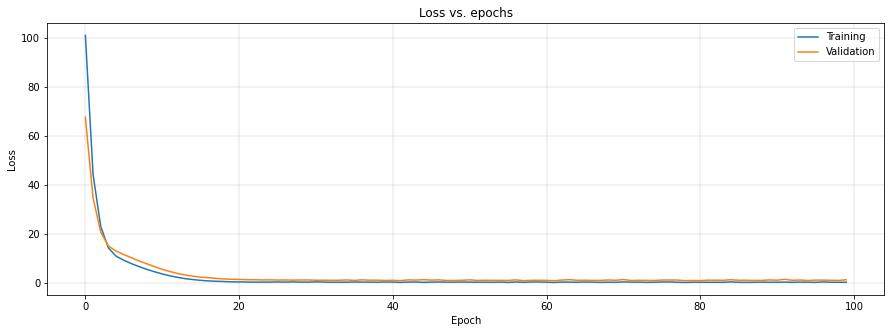

In [6]:
plt.figure(2,figsize=(15, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.grid(color='k', linestyle='-', linewidth=0.1)
plt.show()

----------------------------------------------------------------------
## Experiment-1:  Comparison of the FFT and DNN simulated Fourier Transform on random generated series
----------------------------------------------------------------------


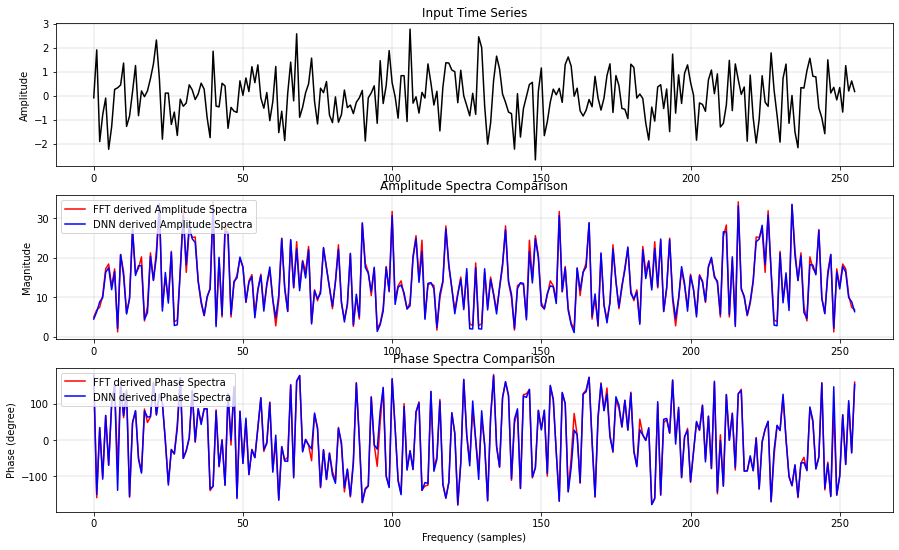

In [7]:
#Prediction with trainned network
dnn_predictions = model.predict(test_input)
dnn_err         = dnn_predictions - test_target

# make the comparison on selected time series
qc_series_id = 300

plt.figure(2,figsize=(15, 9))
plt.subplot(311)
plt.title('Input Time Series')
plt.plot(test_input[qc_series_id,:],'k')
plt.grid(color='k', linestyle='-', linewidth=0.1)
plt.ylabel('Amplitude')

plt.subplot(312)
plt.title('Amplitude Spectra Comparison')
plt.plot(np.abs(test_target[qc_series_id,0::2]+1j*test_target[qc_series_id,1::2]),'r',label='FFT derived Amplitude Spectra')
plt.plot(np.abs(dnn_predictions[qc_series_id,0::2]+1j*dnn_predictions[qc_series_id,1::2]),'b',label='DNN derived Amplitude Spectra')
plt.grid(color='k', linestyle='-', linewidth=0.1)
plt.legend(loc='upper left')
# plt.xlabel('Frequency (samples)')
plt.ylabel('Magnitude')

plt.subplot(313)
plt.title('Phase Spectra Comparison')
plt.plot(np.angle(test_target[qc_series_id,0::2]+1j*test_target[qc_series_id,1::2],deg=True),'r',label='FFT derived Phase Spectra')
plt.plot(np.angle(dnn_predictions[qc_series_id,0::2]+1j*dnn_predictions[qc_series_id,1::2],deg=True),'b',label='DNN derived Phase Spectra')
plt.xlabel('Frequency (samples)')
plt.ylabel('Phase (degree)')
plt.grid(color='k', linestyle='-', linewidth=0.1)
plt.legend(loc='upper left')

----------------------------------------------------------------------
## Experiment-2:  Comparison of the FFT and DNN simulated Fourier Transform on a designated time series
----------------------------------------------------------------------

### Generate a synthetic time series based on sinusoid signals

In [8]:
dt,t_min,t_max = 0.002,0,(256-1)*0.002 
t              = np.linspace(t_min,t_max,int((t_max-t_min)/dt+1))
f0,f1,f2,f3,f4 = 30,50,100,160,220
SNR            = 10    
syn_sig        = np.sin((2*np.pi*f0)*t)  + np.sin((2*np.pi*f1)*t) + np.sin((2*np.pi*f2)*t) + np.sin((2*np.pi*f3)*t) + np.sin((2*np.pi*f4)*t)   
syn_data       = syn_sig + np.random.normal(0,10**(-SNR/20),len(syn_sig))


### Apply FFT on generated signal

In [9]:
N=256
fft_syn_data = scipy.fftpack.fft(syn_data[0:N])
# 0 to Fs/2, Fs = 1/Ts
xf = np.linspace(0.0, 1.0/(2*dt), int(N/2))

dnn_predictions_syn = model.predict(syn_data[np.newaxis,...])
dnn_FFT_syn         = dnn_predictions_syn[:,0::2]+1j*dnn_predictions_syn[:,1::2]
dnn_FFT_syn         = np.squeeze(dnn_FFT_syn,axis=0)

### Compare the DNN based Fourier Transform with FFT

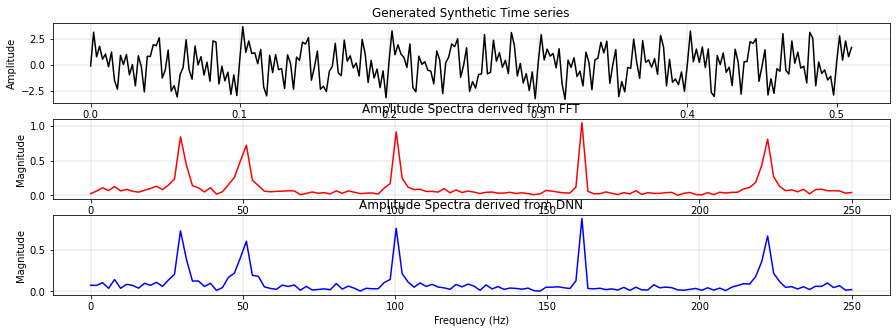

In [10]:

# (1) plot the Amplitude Spectrum Comparison
plt.figure(4,figsize=(15, 5))
plt.subplot(311)
plt.plot(t[0:N],syn_data[0:N],'k') 
# plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Generated Synthetic Time series')
plt.grid(color='k', linestyle='-', linewidth=0.1)
plt.subplot(312)
plt.plot(xf, 2.0/N * np.abs(fft_syn_data[:N//2]),'r')
plt.ylabel('Magnitude')
plt.title('Amplitude Spectra derived from FFT')
plt.grid(color='k', linestyle='-', linewidth=0.1)
plt.subplot(313)
plt.plot(xf, 2.0/N * np.abs(dnn_FFT_syn[:N//2]),'b')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Amplitude Spectra derived from DNN')
plt.grid(color='k', linestyle='-', linewidth=0.1)
plt.show()




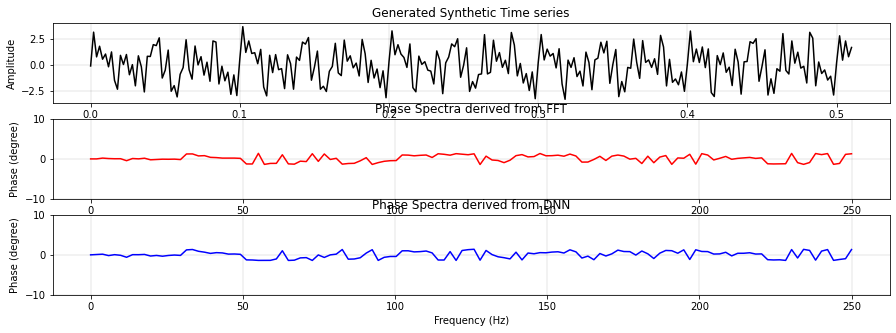

In [11]:
# (2) plot the Phase Spectrum Comparison
# plot the generated series
plt.figure(5,figsize=(15, 5))
plt.subplot(311)
plt.plot(t[0:N],syn_data[0:N],'k') 
# plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Generated Synthetic Time series')
plt.grid(color='k', linestyle='-', linewidth=0.1)

# 0 to Fs/2, Fs = 1/Ts
xf = np.linspace(0.0, 1.0/(2*dt), int(N/2))
plt.subplot(312)
plt.plot(xf, 2.0/N * np.angle(fft_syn_data[:N//2],deg=True),'r')
plt.ylabel('Phase (degree)')
plt.ylim(-10, 10)
plt.title('Phase Spectra derived from FFT')
plt.grid(color='k', linestyle='-', linewidth=0.1)

dnn_predictions_syn = model.predict(syn_data[np.newaxis,...])
dnn_FFT_syn         = dnn_predictions_syn[:,0::2]+1j*dnn_predictions_syn[:,1::2]
dnn_FFT_syn         = np.squeeze(dnn_FFT_syn,axis=0)

plt.subplot(313)
plt.plot(xf, 2.0/N * np.angle(dnn_FFT_syn[:N//2],deg=True),'b')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase (degree)')
plt.ylim(-10, 10)
plt.title('Phase Spectra derived from DNN')
plt.grid(color='k', linestyle='-', linewidth=0.1)
plt.show()